In [1]:
# Upgrading tensorflow
!pip install tensorflow -U

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 62.5MB/s 
     |████████████████████████████████| 3.8MB 47.3MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
# Loading the dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Visualizing the dataset with numpy
import numpy as np
np.set_printoptions(linewidth=1000)
print(X_train[0])
print(f'Actual Value: {y_train[0]}')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

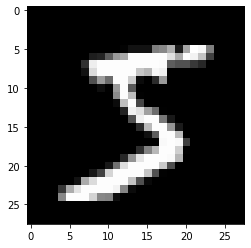

Actual Value: 5


In [4]:
# Visualizing the dataset with matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()
print(f'Actual Value: {y_train[0]}')

In [0]:
# Reshaping input data according to the model input
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

In [0]:
# Normalizing the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# Importing the required classes for model creation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [0]:
# Defining the model architecture
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [9]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

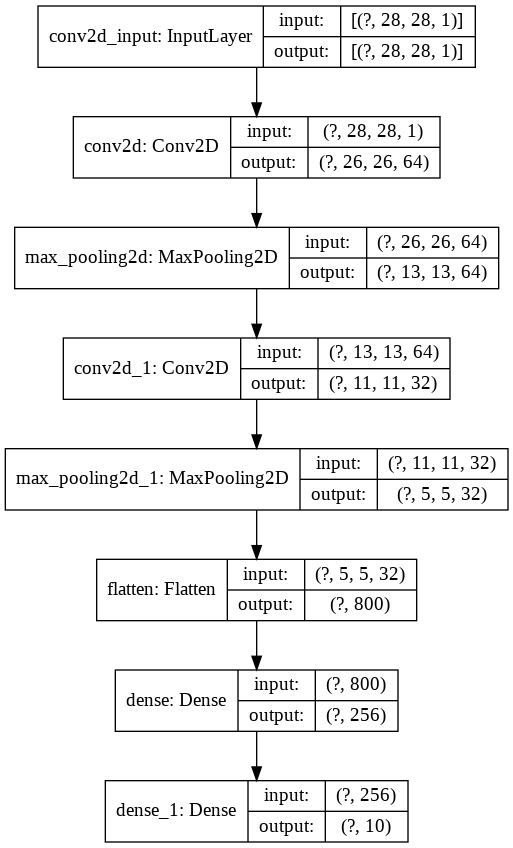

In [10]:
# Visualizing the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [0]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Fitting the model to the training dataset
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1227 - accuracy: 0.9623
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0414 - accuracy: 0.9869
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0285 - accuracy: 0.9910
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0201 - accuracy: 0.9936
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0152 - accuracy: 0.9951
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0130 - accuracy: 0.9956
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0087 - accuracy: 0.9973
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0089 - accuracy: 0.9972
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0074 - accuracy: 0.9977
Epoch 10/10


In [13]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}\tAccuracy: {accuracy}')

10000/10000 [==============================] - 1s 86us/sample - loss: 0.0487 - accuracy: 0.9894
Loss: 0.048673623249197155	Accuracy: 0.9894000291824341


In [14]:
# Predicting from the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]
